# 아직 잠재적인 문제가 남아있다
- 길이가 25cm, 무게가 150g을 주니까 
  원래는 도미(1)가 정답인데, 빙어(0)로 예측한다
- 왜일까?

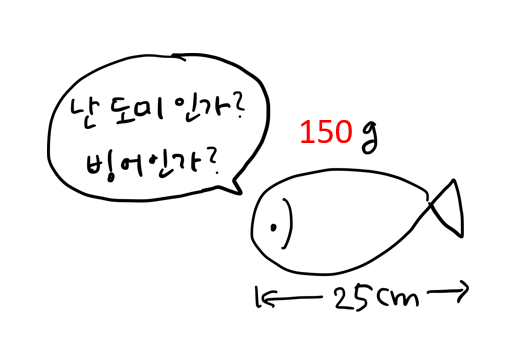

In [25]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [26]:
print(len(fish_length))
print(len(fish_weight))

49
49


In [27]:
# 앞에서는 zip함수와 '리스트 내포' 문법으로 데이터를 준비했다.
# numpy를 사용하면 좀 더 편하다
import numpy as np

np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [28]:
fish_data = inp.column_stack((fsh_length, fish_weight))

fish_data

NameError: name 'inp' is not defined

In [8]:
# 잘 되었는지 5개만 확인
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [9]:
# 앞에서는 [1] * 35 + [0] * 14 이렇게 준비했는데
# 이것 역시 쉽게 만드는 방법이 있다
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [10]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
# 배열 합치기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
# 훈련데이터와 테스트데이터를 섞는 보다 쉬운 방법
from sklearn.model_selection import train_test_split

# 기본 75%/25%로 나눈다
train_input, test_input, train_target, test_target = \
                train_test_split(fish_data, fish_target, random_state=42)

In [16]:
print(len(train_input))
print(len(train_target))
print(len(test_input))
print(len(test_target))

36
36
13
13


In [17]:
print(train_target)
print(test_target)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
# 비율대로 골고루 섞이려면 아래처럼 한다
# 3:1로 나눌 때 0과 1도 고르게 분포하도록 조정한다
train_input, test_input, train_target, test_target = \
                train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [19]:
# 일단 25cm, 150g을 예측해보자

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

## 학습과 테스트를 해보니 별 문제 없는 것처럼 보인다

In [20]:
# 잘 못 판단하는 데이터를 예측해본다
print(kn.predict([[25, 150]]))

[0.]


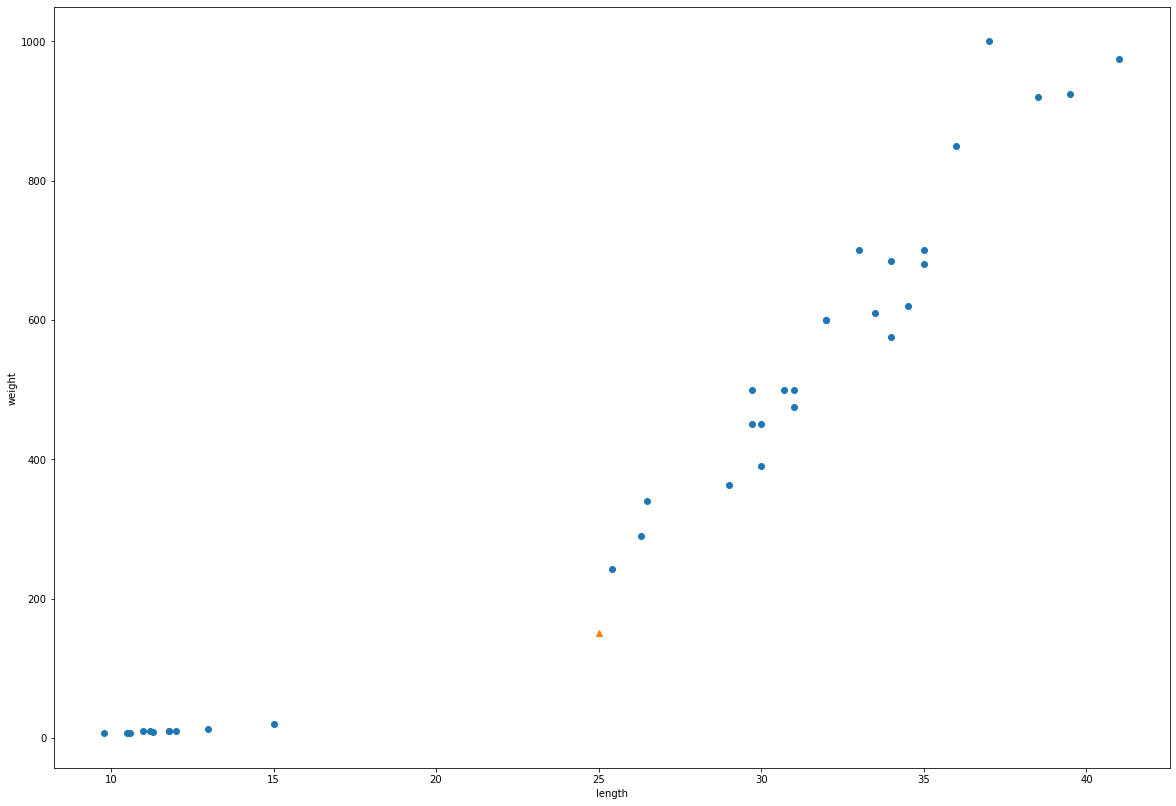

In [24]:
# 빙어(0)로 분류되었는데 시각화를 해보자
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [20, 14]

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# 가장 가까운 이웃 5개의 거리와 인덱스를 확인한다
distances, indexes = kn.kneighbors([[25, 150]])

print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


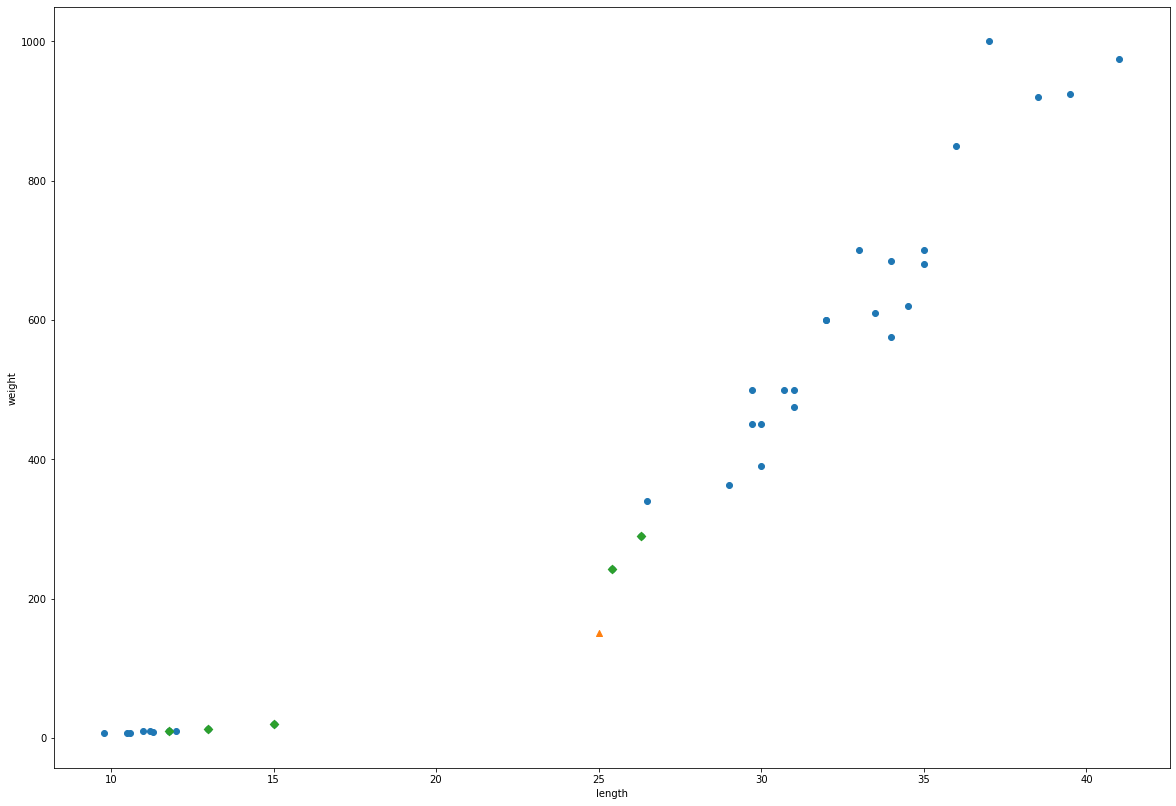

In [31]:
# 가장 가까운 데이터 5개를 시각화 해보자
plt.scatter(train_input[:, 0], train_input[: ,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 잘 관찰해보면 x축의 범위가 좁고, y축은 범위가 넓다
```
그래서 서로 다른 속성의 범위를 동일한 기준으로 맞춰줘야 한다
```

In [33]:
print(f'{np.min(train_input[:, 0])} ~ {np.max(train_input[:, 0])}')
print(f'{np.min(train_input[:, 1])} ~ {np.max(train_input[:, 1])}')

9.8 ~ 41.0
6.7 ~ 1000.0


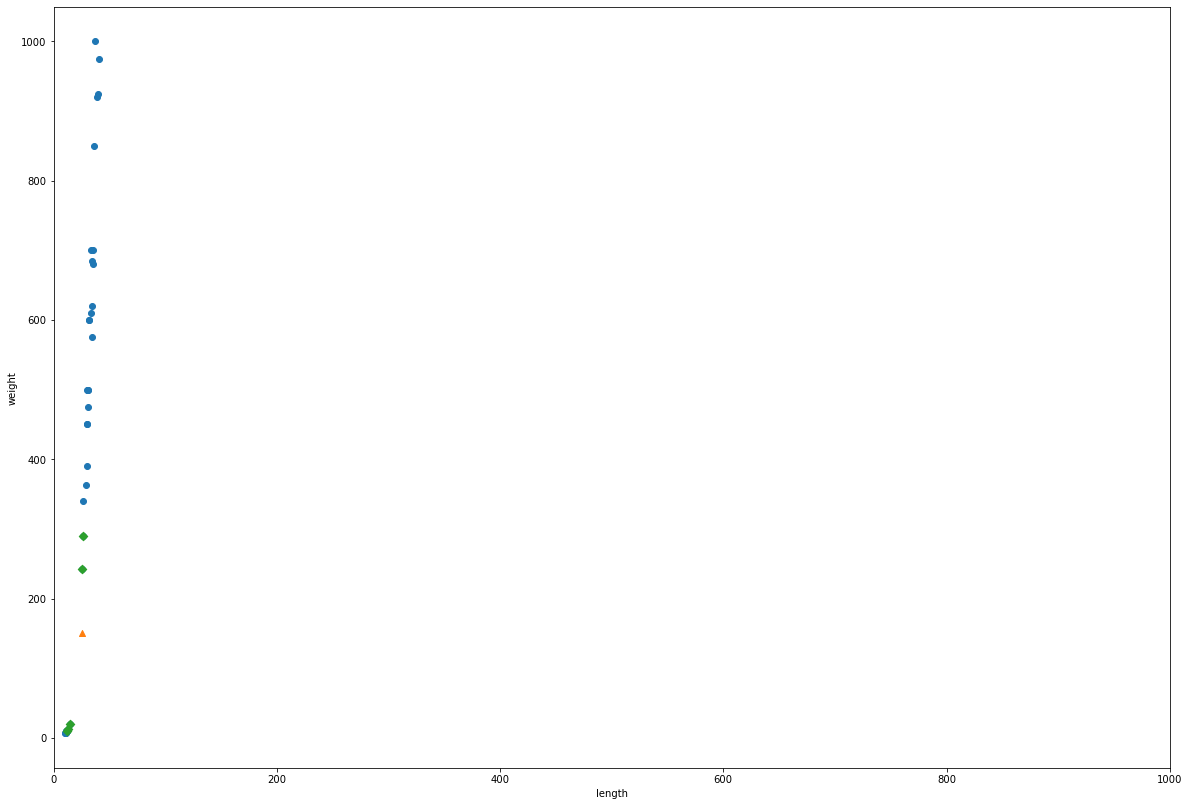

In [34]:
plt.scatter(train_input[:, 0], train_input[: ,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0, 1000)               # 눈금의 범위를 직접 지정한다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 입력값의 기준이 다르면 알고리즘이 정확히 동작하지 않는다
- 그래서 일정한 기준으로 맞춰줘야 한다
- 이것을 '데이터 전처리(Data Preprocessing)이라고 한다'
- 서로 다른 비율의 입력값을 전처리 하는 방법은 '표준점수(Standard score)' == z점수
- (값 - 평균)/표준편차

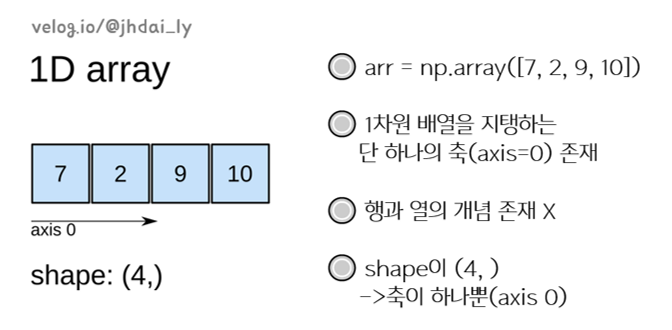

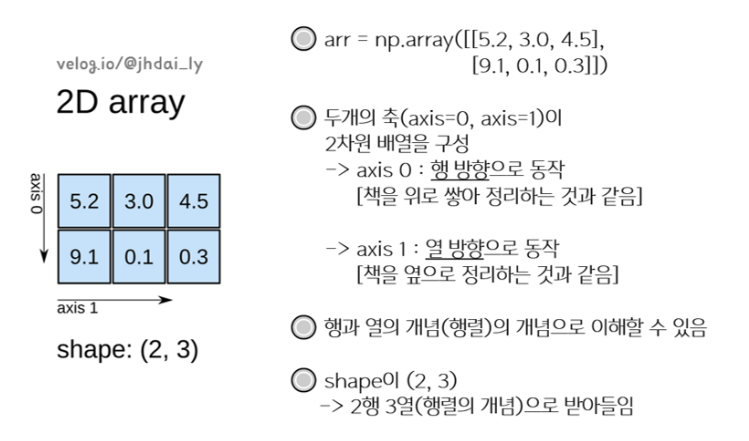

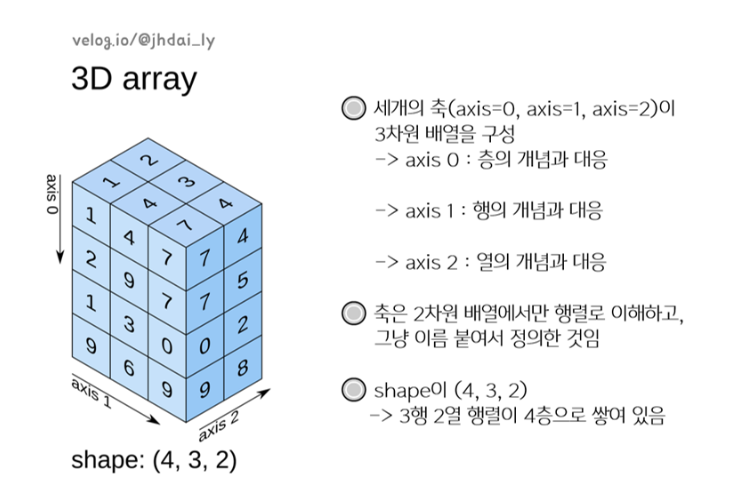

In [36]:
mean = np.mean(train_input, axis=0)     # 평균
std = np.std(train_input, axis=0)       # 표준편차

print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [37]:
train_scaled = (train_input - mean) / std